<h2> MNIST Dataset </h2>

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

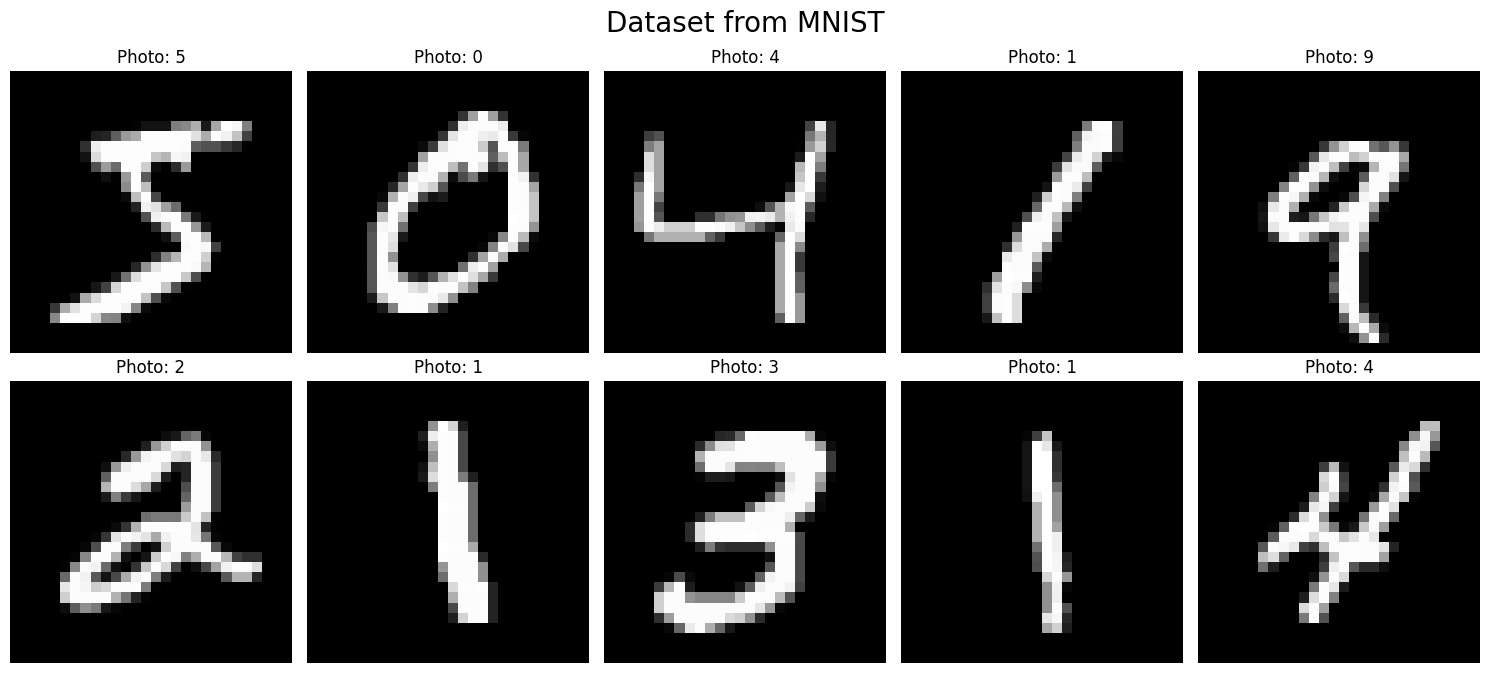

In [2]:
# Process MNIST Dataset
if __name__ == "__main__":
    tf.get_logger().setLevel('ERROR')
    tf.random.set_seed(42)

    # Download the MNIST dataset from google cloud
    mnist_url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"
    data = tf.keras.utils.get_file(origin=mnist_url, fname="mnist.npz", extract=False)
    with np.load(data) as data:
        x_train, y_train = data['x_train'], data['y_train']
        x_test, y_test = data['x_test'], data['y_test']

    # Display images from the dataset
    total_photos = 10
    show_photos = [(x_train[i], y_train[i]) for i in range(total_photos)]

    # Show example images with plot
    fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 7))
    fig.suptitle(f"Dataset from MNIST", fontsize=20)
    for i in range(2):
        for j in range(5):
            img = show_photos[i * 5 + j][0]
            ax[i, j].imshow(img, cmap='gray')
            ax[i, j].set_title(f"Photo: {show_photos[i * 5 + j][1]}")
            ax[i, j].axis('off')

    plt.tight_layout()
    plt.show()

    # Reshape the photos and create images
    x_train = np.expand_dims(x_train, axis=-1)
    x_test = np.expand_dims(x_test, axis=-1)

    BATCH_SIZE = 35
    train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(50000).batch(BATCH_SIZE)
    test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

    # Load MNIST dataset
    mnist = tf.keras.datasets.mnist
    (x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

    # Normalize the pixel values
    x_train_full, x_test = x_train_full / 255.0, x_test / 255.0

    # Include the channel dimension
    x_train_full = np.expand_dims(x_train_full, axis=-1)
    x_test = np.expand_dims(x_test, axis=-1)

    # Split dataset into training and validation sets
    val_split = 0.1
    val_sets = int(len(x_train_full) * val_split)
    x_train, y_train = x_train_full[val_sets:], y_train_full[val_sets:]
    x_val, y_val = x_train_full[:val_sets], y_train_full[:val_sets]

<h2> Convolutional Neural Network </h2>

In [3]:
# Create convolutional neural network model
def cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (4, 4), padding="same", activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), padding="same", activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 64)                2

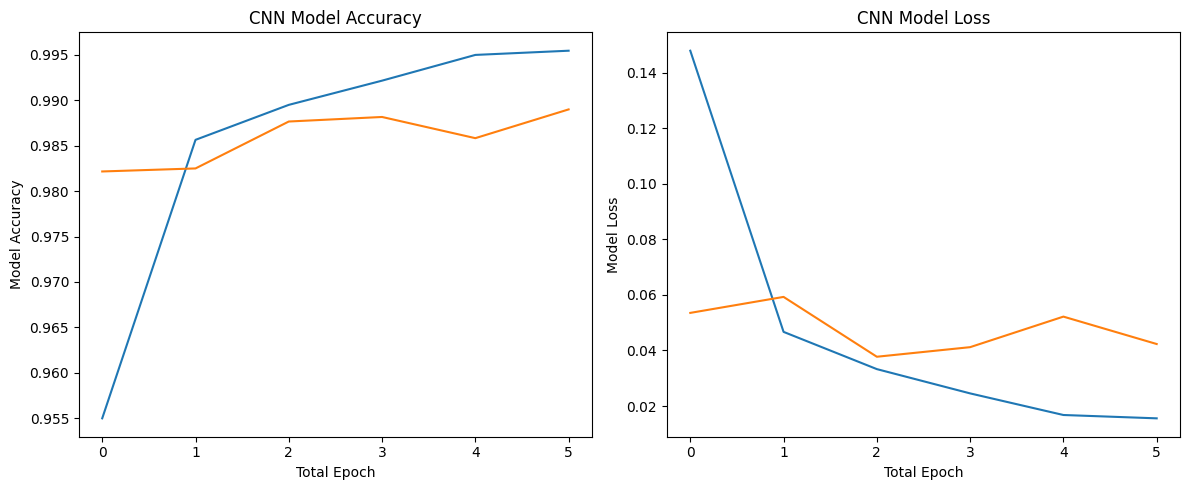

In [4]:
if __name__ == "__main__":

    # Create the model
    model = cnn_model()

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Display model summary
    model.summary()

    # Train the model with validation data
    history = model.fit(x_train, y_train, epochs=6, batch_size=35,
                        validation_data=(x_val, y_val))

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_acc}")

    # Plot training history
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('CNN Model Accuracy')
    plt.xlabel('Total Epoch')
    plt.ylabel('Model Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('CNN Model Loss')
    plt.xlabel('Total Epoch')
    plt.ylabel('Model Loss')

    plt.tight_layout()
    plt.show()

<h2> Dense Neural Netwok </h2>

In [5]:
# Create dense neural network
def dense():
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 567434 (2.16 MB)
Trainable params: 567434 (2.16 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/6
1543/154

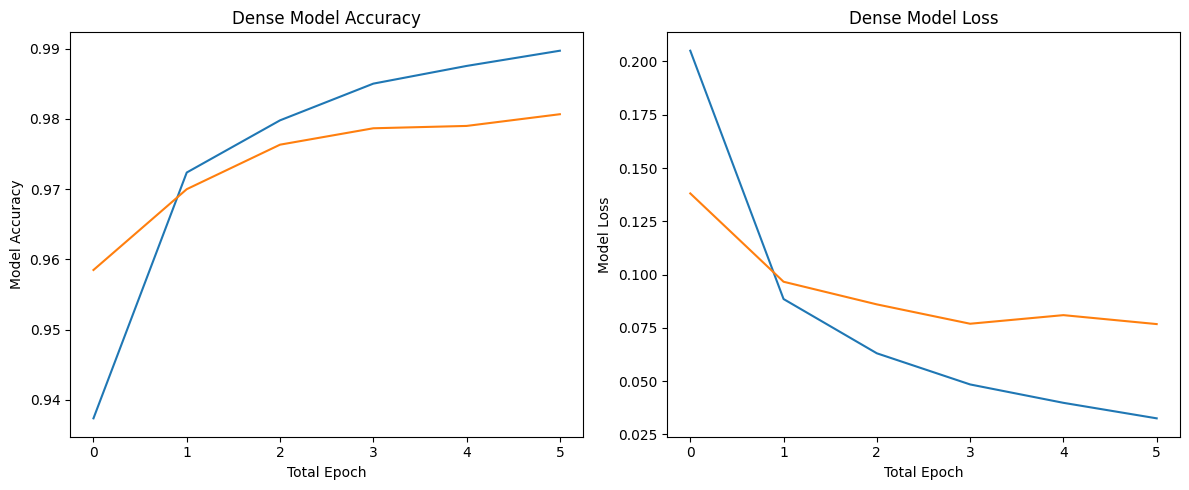

In [6]:
if __name__ == "__main__":

    # Create the model
    model = dense()

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Display model summary
    model.summary()

    # Train the model with validation data
    history = model.fit(x_train, y_train, epochs=6, batch_size=35,
                        validation_data=(x_val, y_val))

    # Evaluate the model on the test set
    test_loss, test_acc = model.evaluate(x_test, y_test)
    print(f"Test Accuracy: {test_acc}")

     # Plot training history
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Dense Model Accuracy')
    plt.xlabel('Total Epoch')
    plt.ylabel('Model Accuracy')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Dense Model Loss')
    plt.xlabel('Total Epoch')
    plt.ylabel('Model Loss')

    plt.tight_layout()
    plt.show()